In [13]:
import torch
import sklearn
import sklearn.datasets

准备数据集

In [14]:
X,y = sklearn.datasets.make_moons(200,noise=0.2)

数据集是这个样子的

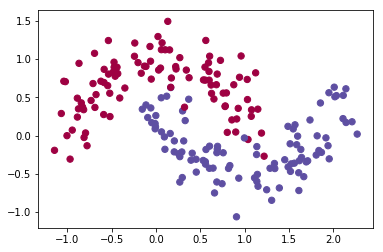

In [15]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],s=40,c=y,cmap=plt.cm.Spectral)

然后定义这样的网络结构


<img src="network.png" width=400 align="left"  />


In [30]:
import torch.nn as nn
import torch.nn.functional as F
 
class MyClassifier(nn.Module):
    def __init__(self):
        super(MyClassifier,self).__init__()
        self.fc1 = nn.Linear(2,3)
        self.fc2 = nn.Linear(3,2)
        
    def forward(self,x):
        x = self.fc1(x)
        x = torch.tanh(x)
        x = self.fc2(x)
        return x
             
    def predict(self,x):
        pred = F.softmax(self.forward(x), dim= 1)
        ans = []
        for t in pred:
            if t[0]>t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)

将样本数据从 numpy 转成 tensor

In [31]:
X = torch.from_numpy(X).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.LongTensor)

TypeError: expected np.ndarray (got Tensor)

损失函数用 CrossEntropyLoss，梯度优化器使用 Adam

In [32]:
model = MyClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

训练神经网络

In [33]:
epochs = 10000
losses = []
for i in range(epochs):
    y_pred = model.forward(X) # 算输出
    loss = criterion(y_pred,y)   # 算loss 
    losses.append(loss.item()) # 记录每次的loss ， 和训练关系不大
    optimizer.zero_grad()        # 清除梯度记录
    loss.backward()                # 反向传播
    optimizer.step()                # 更新参数

In [34]:
from sklearn.metrics import accuracy_score
print(accuracy_score(model.predict(X),y))

0.97
